In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Task 3.1: In which country do products need especially much water in general?
# Step 1: Compare the average water usage for all products ins all countries
# Step 2: Compare the water usage per product that is above average: In which country does each product need the most water?
# Step 3: Display the average water usage per country as a bar diagram

# Task 3.2: Which product needs especially much water independent of the country where it is produced?
# Step 1: Calculate the average water usage per product
# Step 2: Display the average water usage per product as a bar diagram

# Step 1
# 1. Import csv
df = pd.read_csv("C:/Users/MM/Downloads/TechLabs/New_2016.csv", sep=";", header=1)
df.replace(to_replace=0,value=np.nan,inplace=True)
df.loc[25]
display(df)

,Country Name,Country FAO Code,Country ISO2,Item Name,Item FAO Code,Item Category,Unit of Measure,2016
0,Austria,11,AT,Apples,515,Fruits,m3/ton,251.289993
1,Austria,11,AT,Asparagus,367,Vegetables,m3/ton,2152.719971
2,Austria,11,AT,Carrots and turnips,426,Vegetables,m3/ton,88.053802
3,Austria,11,AT,Cherries,531,Fruits,m3/ton,687.744019
4,Austria,11,AT,"Chillies and peppers, green",401,Vegetables,m3/ton,49.357101
...,...,...,...,...,...,...,...,...
220,Turkey,223,TR,Peaches and nectarines,534,Fruits,m3/ton,279.402008
221,Turkey,223,TR,Pears,521,Fruits,m3/ton,519.427002
222,Turkey,223,TR,Potatoes,116,Vegetables,m3/ton,104.871002
223,Turkey,223,TR,"Pumpkins, squash and gourds",394,Vegetables,m3/ton,738.070007


In [5]:
# Task 3.1: In which country do products need especially much water in general?
# Step 1: Compare the average water usage for all products ins all countries
# a. Data cleaning: remove (drop) all values that are zero (nan values) from water usage column "2016" and, when copying the data set, don't forget to set the inplace parameter to True
# b. Make a copy of the dataframe
copycountry = df.copy()
copycountry["2016"].dropna(inplace=True)


In [6]:
# Step 1: Compare the average water usage for all products ins all countries
# c. Calculate the average water usage per country by grouping the countries
grouped_copycountry = copycountry.groupby("Country Name")
mean_copycountry = grouped_copycountry.mean()
mean_copycountry = mean_copycountry.reset_index()
#print(mean_copycountry)

# Step 2: Compare the water usage per product that is above average: In which country does each product need the most water?
# a. In the table, only display the average of column "Country Name" and "2016" (water usage)
# b. Only display the top 5 values of "2016"
mean_copycountry[["Country Name", "2016"]]
mean_copycountry.nlargest(5, "2016")


,Country Name,Country FAO Code,Item FAO Code,2016
8,Netherlands,150.0,401.8,2532.964931
7,Morocco,143.0,401.8,1070.761258
10,Portugal,174.0,401.8,748.693063
4,Greece,84.0,401.8,547.131133
13,Spain,203.0,401.8,505.430340


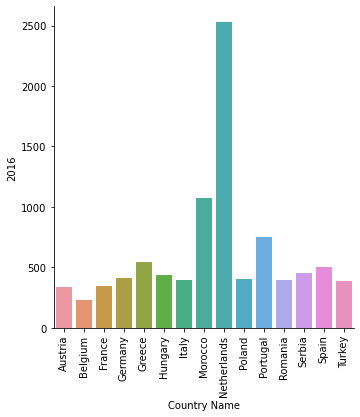

In [7]:
# Step 3: Display the average water usage per country as a bar diagram
# Plot the distribution of the water usage in column "2016" by using seaborns displot function and make sure country names are readable
# Input the 2016 column of your dataframe
cx=sns.catplot(x="Country Name", y="2016", kind="bar", data=mean_copycountry)
cx.set_xticklabels(rotation=90)



In [8]:
# Task 3.2: Which product needs especially much water independent of the country where it is produced?
# Step 1: Calculate the average water usage per product by grouping the fruits after having created a copy of the data set
copyitem = df.copy()
grouped_copyitem = copyitem.groupby("Item Name")
mean_copyitem = grouped_copyitem.mean()
mean_copyitem = mean_copyitem.reset_index()

# Only diplay the "Item Name" and average of column "2016" for the top/lowest 5 values
mean_copyitem[["Item Name", "2016"]]
#mean_copyitem.nlargest(5, "2016")
mean_copyitem.nsmallest(5, "2016")

,Item Name,Country FAO Code,Item FAO Code,2016
14,Tomatoes,148.066667,388.0,68.395452
5,Cucumbers and gherkins,148.066667,397.0,83.259040
2,Carrots and turnips,148.066667,426.0,97.230101
4,"Chillies and peppers, green",148.066667,401.0,101.154696
7,Lettuce and chicory,148.066667,372.0,125.192501


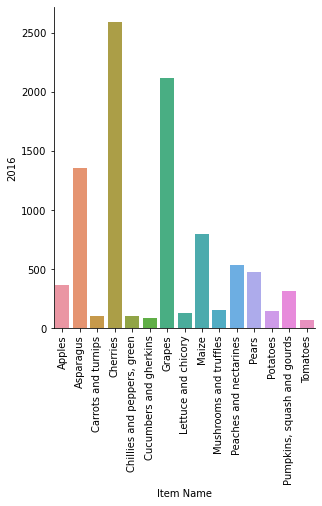

In [9]:
# Step 2: Display the average water usage per product as a bar diagram
cx=sns.catplot(x="Item Name", y="2016", kind="bar", data=mean_copyitem)
cx.set_xticklabels(rotation=90)

In [11]:
# Task 5: How do the results change for one portion size of each product?
# Step 1: Add one column to the mean copy table with products independently grouped over the countries "mean_copyitem": this column "Portion" displays the factor to multiply the product with to receive one portion
# Step 2: Multiply the new column "Portion" with column "2016"

#Step 1: 
mean_copyitem["Portion"]=[0.1,0.5,0.1,0.03,0.1,0.2,0.1,0.3,0.2,0.1,0.1,0.2,0.4,0.3,0.1]
display(mean_copyitem)



,Item Name,Country FAO Code,Item FAO Code,2016,Portion
0,Apples,148.066667,515.0,365.470595,0.10
1,Asparagus,148.066667,367.0,1351.987676,0.50
2,Carrots and turnips,148.066667,426.0,97.230101,0.10
3,Cherries,148.066667,531.0,2591.892588,0.03
4,"Chillies and peppers, green",148.066667,401.0,101.154696,0.10
5,Cucumbers and gherkins,148.066667,397.0,83.259040,0.20
6,Grapes,148.066667,560.0,2116.552261,0.10
7,Lettuce and chicory,148.066667,372.0,125.192501,0.30
8,Maize,148.066667,56.0,798.215393,0.20
9,Mushrooms and truffles,148.066667,449.0,148.780370,0.10


In [12]:
# Step 2: Multiply the new column "Portion" with column "2016"
mean_copyitem["Item portion"]=mean_copyitem["2016"]*mean_copyitem["Portion"]
display(mean_copyitem)

,Item Name,Country FAO Code,Item FAO Code,2016,Portion,Item portion
0,Apples,148.066667,515.0,365.470595,0.10,36.547060
1,Asparagus,148.066667,367.0,1351.987676,0.50,675.993838
2,Carrots and turnips,148.066667,426.0,97.230101,0.10,9.723010
3,Cherries,148.066667,531.0,2591.892588,0.03,77.756778
4,"Chillies and peppers, green",148.066667,401.0,101.154696,0.10,10.115470
5,Cucumbers and gherkins,148.066667,397.0,83.259040,0.20,16.651808
6,Grapes,148.066667,560.0,2116.552261,0.10,211.655226
7,Lettuce and chicory,148.066667,372.0,125.192501,0.30,37.557750
8,Maize,148.066667,56.0,798.215393,0.20,159.643079
9,Mushrooms and truffles,148.066667,449.0,148.780370,0.10,14.878037


In [13]:
# Display the top 5 products with the most/least water usage per portion size from the mean_copyitem table
#mean_copyitem.nlargest(5, ['Item portion'])
mean_copyitem.nsmallest(5, ['Item portion'])


,Item Name,Country FAO Code,Item FAO Code,2016,Portion,Item portion
14,Tomatoes,148.066667,388.0,68.395452,0.1,6.839545
2,Carrots and turnips,148.066667,426.0,97.230101,0.1,9.723010
4,"Chillies and peppers, green",148.066667,401.0,101.154696,0.1,10.115470
9,Mushrooms and truffles,148.066667,449.0,148.780370,0.1,14.878037
5,Cucumbers and gherkins,148.066667,397.0,83.259040,0.2,16.651808


KeyError: 'Item portion'